# N- Grams

People like the late physicist Stephen Hawking who are unable to
physically talk or sign can instead use simple movements to select words from a menu to be spoken by the system. Word prediction can be used to suggest likely words for the menu.

Models that assign probabilities to sequences of words are called language models or LMs. In this chapter we introduce the simplest model that assigns probabilities LM to sentences and sequences of words, the n-gram.

N-grams are the progressive sets of n words from a given text.
What do I mean by progressive?
Well, n-grams are "selected" from text 'n' at a time, and they overlap by "n-1" words for each n-gram. As with most things this is more easily explained with an example.

Let’s begin with the task of computing P(w|h), the probability of a word w given some history h. Suppose the history h is “its water is so transparent that” and we want to know the probability that the next word is the:

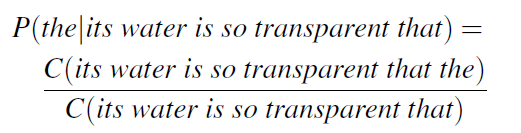

This method of estimating probabilities directly from counts works fine in many cases, it turns out that even the web isn’t big enough to give us good estimates in most cases. This is because language is creative; new sentences are created all the time, and we won’t always be able to count entire sentences.

For this reason, we’ll need to introduce cleverer ways of estimating the probability of a word w given a history h, or the probability of an entire word sequence W.

Let’s start with a little formalizing of notation. To represent the probability of a particular random variable Xi taking on the value “the”, or P(Xi = “the”), we will use the simplification P(the). We’ll represent a sequence of N words either as w1....w^n or w1^n (so the expression w1^(n-1) means the string w1,w2...w(n-1)).

For the joint probability of each word in a sequence having a 
particular value P(X = w1,Y = w2,Z = w3........W = wn) we’ll use P(w1,w2............wn).

Now how can we compute probabilities of entire sequences like P(w1,w2,.....wn)?

One thing we can do is decompose this probability using the chain rule of probability.

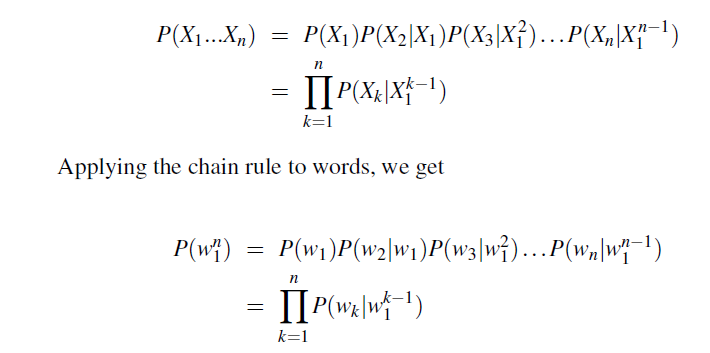

we could estimate the joint probability of an entire sequence of words by multiplying together a number of conditional probabilities. But using the chain rule doesn’t really seem to help us!

We don’t know any way to compute the exact probability of a word given a long sequence of preceding words, P(wn|w1^(n-1) ). As we said above, we can’t just estimate by counting the number of times every word occurs following every long string, because language is creative and any particular context might have never occurred before!

The intuition of the n-gram model is that instead of computing the probability of a word given its entire history, we can approximate the history by just the last few words.

instead of computing the probability

P(the|Walden Pond’s water is so transparent that)

we approximate it with the probability

P(the|that)

### Markov assumption

The assumption that the probability of a word depends only on the previous word is called a Markov assumption.

Markov models are the class of probabilistic models that assume we can predict the probability of some future unit without looking too
far into the past. We can generalize the bigram (which looks one word into the past) to the trigram (which looks two words into the past) and thus to the n-gram (which looks n-1 words into the past).

#### How do we estimate these bigram or n-gram probabilities?

An intuitive way to estimate probabilities is called **maximum likelihood** estimation or MLE. We get the MLE estimate for the parameters of an n-gram model by getting counts from a corpus, and normalizing the counts so that they lie between 0 and 1.

For example, to compute a particular bigram probability of a word y given a previous word x, we’ll compute the count of the bigram C(xy) and normalize by the sum of all the bigrams that share the same first word x:

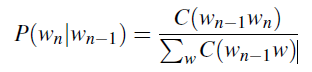

We can simplify this equation, since the sum of all bigram counts that start with a given word w(n-1) must be equal to the unigram count for that word w(n-1)

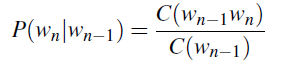

We always represent and compute language model probabilities in log format as log probabilities. Since probabilities are (by definition) less than or equal to probabilities 1, the more probabilities we multiply together, the smaller the product becomes.

Multiplying enough n-grams together would result in numerical underflow. By using log probabilities instead of raw probabilities, we get numbers that are not as small.

Adding in log space is equivalent to multiplying in linear space, so we combine log probabilities by adding them. The result of doing all computation and storage in log space is that we only need to convert back into probabilities if we need to report them at the end; then we can just take the exp of the logprob:

                         p1* p2* p3* p4 = exp(log p1+log p2+log p3+log p4)

### Other Example

The quick brown fox jumped over the lazy dog

1-gram list (aka unigrams)

([“The”], [“quick”], [“brown”], [“fox”], [“jumped”], [“over”], [“the”], [“lazy”], [“dog”])

2-gram list (aka bigrams)

( [“The”, “quick”], [“quick”, “brown”], [“brown”, “fox”], [“fox”, “jumped”], [“jumped”, “over”], [“over”, “the”], [“the”, “lazy”], [“lazy”, “dog”])

### What are n-grams used for?

N-grams are used in the creation of n-gram language models. The basic idea is that in natural language the next word that will be used is dependent upon the previous words. The statistical properties of n-grams can be exploited to generate probabilities for what the “next word” after a given set of words will be. This ability to give a probability for what the next word will be is the n-gram language model.

## CODE FOR N-Grams

In [6]:
def process_text(text):
 
    text = text.lower()
    text = text.replace(',', ' ')
    text = text.replace('/', ' ')
    text = text.replace('(', ' ')
    text = text.replace(')', ' ')
    text = text.replace('.', ' ')
 
    # Convert text string to a list of words
    return text.split()

In [7]:
def generate_ngrams(words_list, n):
    ngrams_list = []
 
    for num in range(0, len(words_list)):
        ngram = ' '.join(words_list[num:num + n])
        ngrams_list.append(ngram)
 
    return ngrams_list

In [9]:
if __name__ == '__main__':
 
    text = 'A quick brown fox jumps over the lazy dog.'
 
    words_list = process_text(text)
    unigrams = generate_ngrams(words_list, 1)
    bigrams = generate_ngrams(words_list, 2)
    trigrams = generate_ngrams(words_list, 3)
    fourgrams = generate_ngrams(words_list, 4)
    fivegrams = generate_ngrams(words_list, 5)

In [10]:
print (unigrams + bigrams + trigrams + fourgrams + fivegrams)

['a', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', 'a quick', 'quick brown', 'brown fox', 'fox jumps', 'jumps over', 'over the', 'the lazy', 'lazy dog', 'dog', 'a quick brown', 'quick brown fox', 'brown fox jumps', 'fox jumps over', 'jumps over the', 'over the lazy', 'the lazy dog', 'lazy dog', 'dog', 'a quick brown fox', 'quick brown fox jumps', 'brown fox jumps over', 'fox jumps over the', 'jumps over the lazy', 'over the lazy dog', 'the lazy dog', 'lazy dog', 'dog', 'a quick brown fox jumps', 'quick brown fox jumps over', 'brown fox jumps over the', 'fox jumps over the lazy', 'jumps over the lazy dog', 'over the lazy dog', 'the lazy dog', 'lazy dog', 'dog']


## Evaluation : How good is our model?

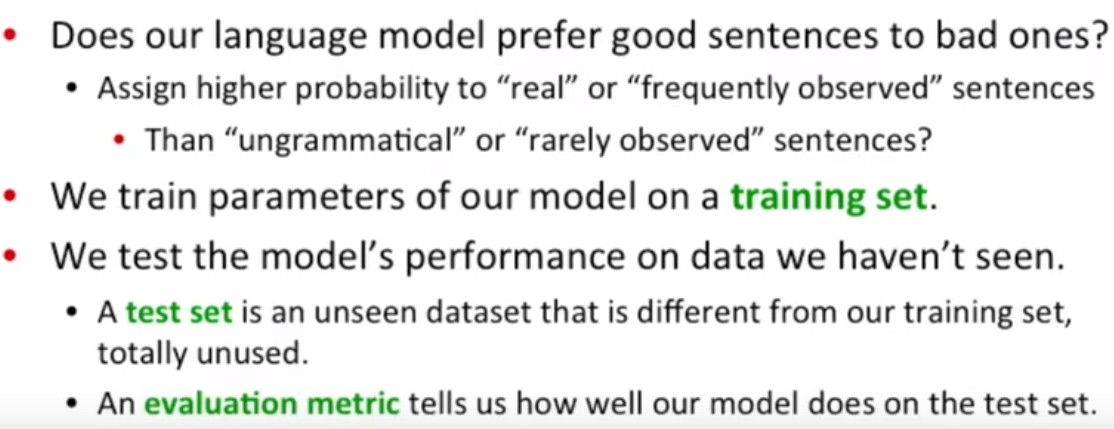

## Extrinsic evaluation

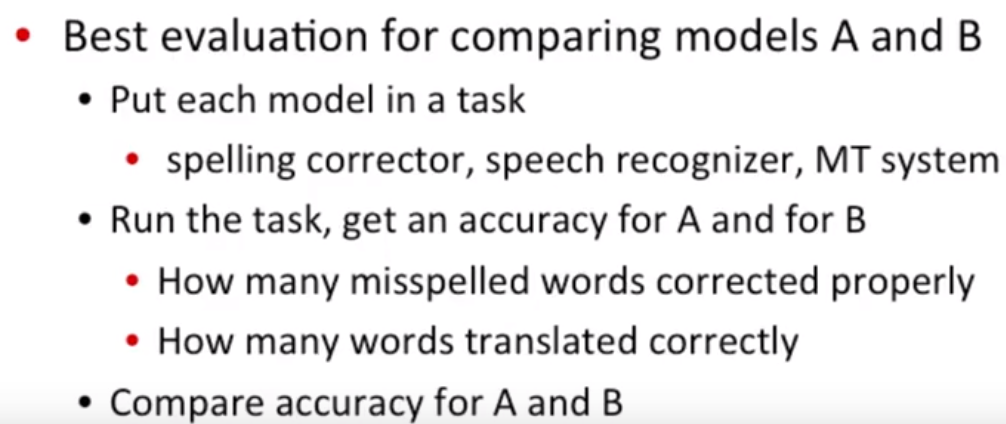

### Unfortunately, running big NLP systems end-to-end is often very expensive. Instead, it would be nice to have a metric that can be used to quickly evaluate potential improvements in a language model.

## Intrinsic Evaluation

the most common intrinsic evaluation is called perplexity, perplexity also happens to be a bad approximation for evaluation, unless the test data looks a lot like the training data.
GENERALLY, it is use for pilot experiment but it can be use with extrinsic evaluation

In practice we don’t use raw probability as our metric for evaluating language models, but a variant called perplexity. The perplexity (sometimes called PP for short) of a language model on a test set is the inverse probability of the test set, normalized by the number of words. For test set W=w1,w2,w3,w4...wn

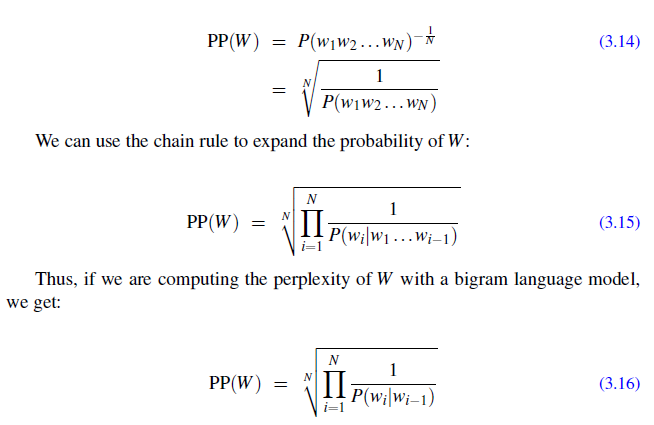

## Perplexity as branching Factor

#### There is another way to think about perplexity: as the weighted average branching factor of a language. The branching factor of a language is the number of possible next words that can follow any word. Consider the task of recognizing the digits in English (zero, one, two,..., nine), given that each of the 10 digits occurs with equal probability P = 1/10 . The perplexity of this mini-language is in fact 10. To see that, imagine a string of digits of length N.

# Generalization and Zeros

The longer the context on which we train the model, the more coherent the sentences.
In the unigram sentences, there is no coherent relation between words or any sentence-final punctuation. The bigram sentences have some local word-to-word coherence (especially if we consider that punctuation counts as a word). The trigram
and 4-gram sentences are beginning to look a lot like Shakespeare. Indeed, a careful investigation of the 4-gram sentences shows that they look a little too much like Shakespeare. The words It cannot be but so are directly from King John. This is
because, not to put the knock on Shakespeare, his oeuvre is not very large as corpora go (N =884,647;V =29,066), and our n-gram probability matrices are ridiculously sparse. There are V2 =844,000,000 possible bigrams alone, and the number of possible 4-grams is V4 = 7*10^17. Thus, once the generator has chosen the first 4-gram (It cannot be but), there are only five possible continuations (that, I, he, thou, and so); indeed, for many 4-grams, there is only one continuation.

Matching genres and dialects is still not sufficient. Our models may still be subject to the problem of sparsity. For any n-gram that occurred a sufficient number of times, we might have a good estimate of its probability. But because any corpus is limited, some perfectly acceptable English word sequences are bound to be missing from it. That is, we’ll have many cases of putative “zero probability n-grams” that should really have some non-zero probability.

Consider the words that follow the bigram denied the in the WSJ Treebank3 corpus, together with their counts:
- denied the allegations: 5
- denied the speculation: 2
- denied the rumors: 1
- denied the report: 1

But suppose our test set has phrases like:
- denied the offer
- denied the loan

Our model will incorrectly estimate that the P(offer|denied the) is 0!
These zeros— things that don’t ever occur in the training set but do occur in the test set—are a problem for two reasons. 

First, their presence means we are underestimating the probability of all sorts of words that might occur, which will hurt the performance of any application we want to run on this data.

Second, if the probability of any word in the test set is 0, the entire probability of the test set is 0. By definition, perplexity is based on the inverse probability of the test set. Thus if some words have zero probability, we can’t compute perplexity at all, since we can’t divide by 0!

# Smoothing

What do we do with words that are in our vocabulary (they are not unknown words) but appear in a test set in an unseen context (for example they appear after a word they never appeared after in training)? To keep a language model from assigning zero probability to these unseen events, we’ll have to shave off a bit of probability mass from some more frequent events and give it to the events we’ve never seen.This modification is called smoothing or discounting.

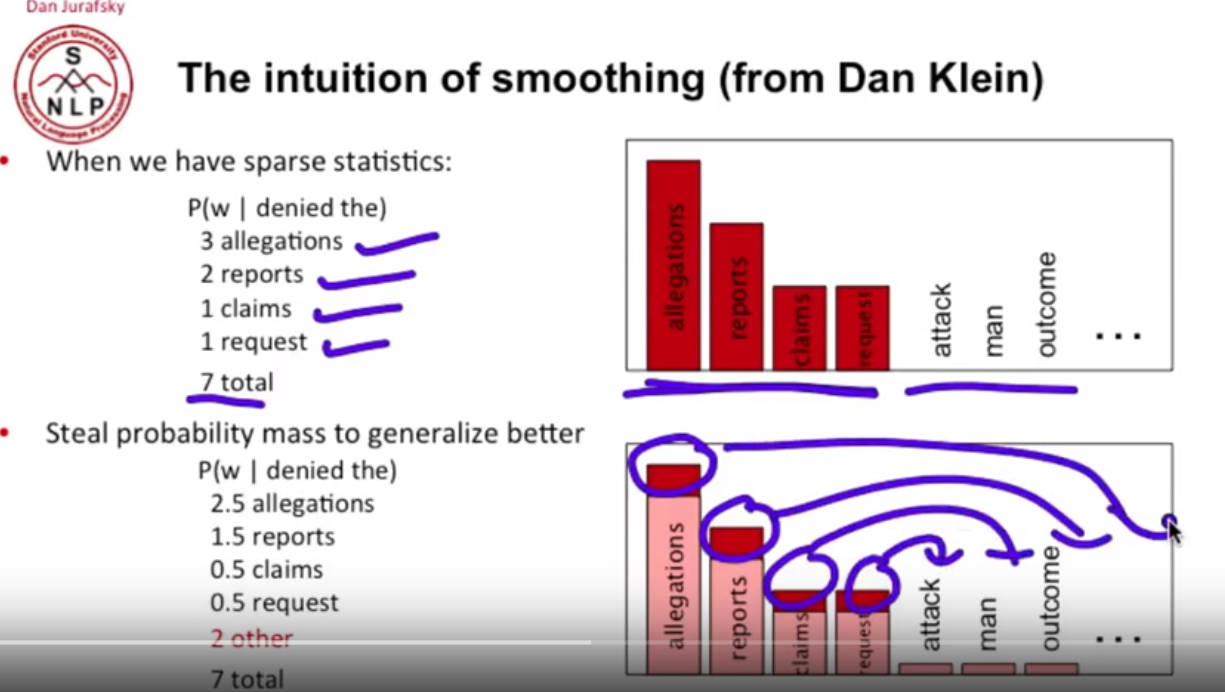

### Steal some probabilty mass, and put that on zero occuring word, so zero go away. This can be done by different method first we are going to discuss is Add-one estimation

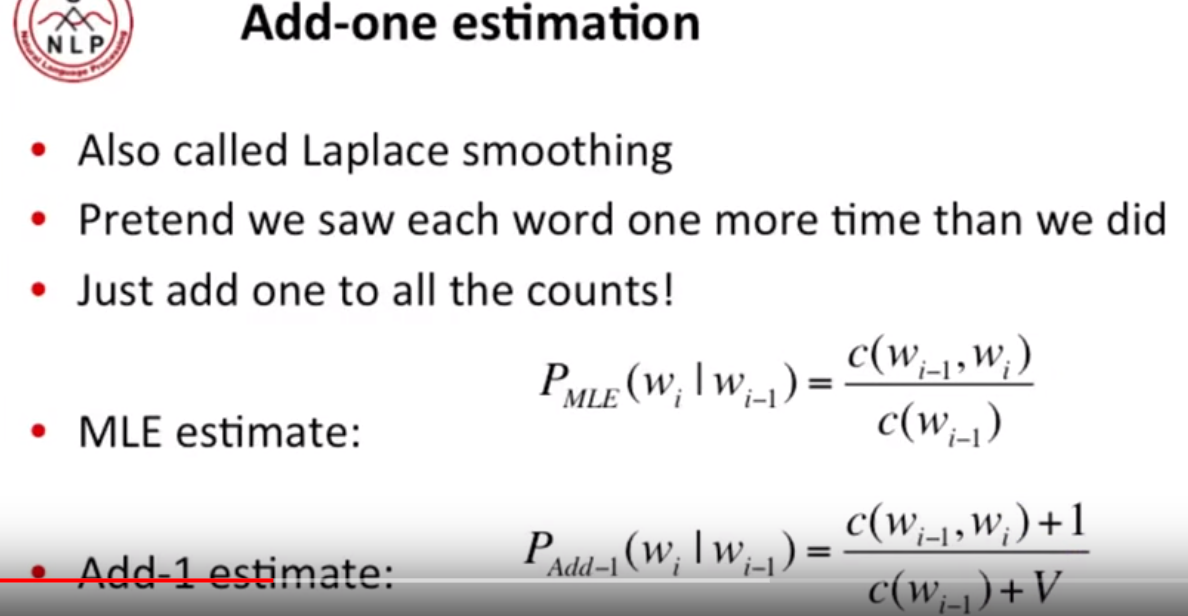

### Let’s start with the application of Laplace smoothing to unigram probabilities. Recall that the unsmoothed maximum likelihood estimate of the unigram probability of the word wi is its count ci normalized by the total number of word tokens N: 
 ## - P(Wi)= Ci/N

### Laplace smoothing merely adds one to each count (hence its alternate name add-one smoothing). Since there are V words in the vocabulary and each one was incremented, we also need to adjust the denominator to take into account the extra V observations.

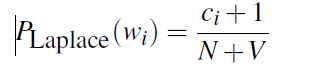

## discounting
A related way to view smoothing is as discounting (lowering) some non-zero counts in order to get the probability mass that will be assigned to the zero counts.

### Thus, instead of referring to the discounted counts (c*), we might describe a smooth discounting algorithm in terms of a relative discount dc, the ratio of the discounted counts to the original counts:
##                                                     Dc = (c*)/c

Now that we have the intuition for the unigram case, let’s smooth our Berkeley Restaurant Project bigrams. Figure 3.5 shows the add-one smoothed counts for the bigrams in Fig. 3.1.

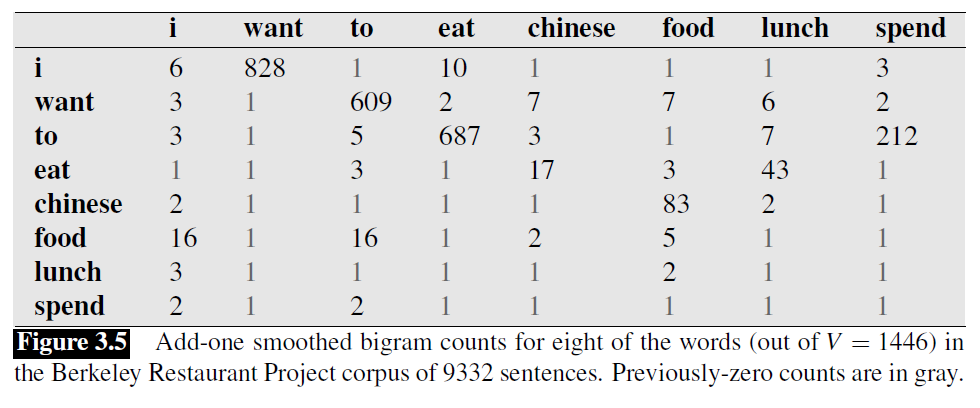

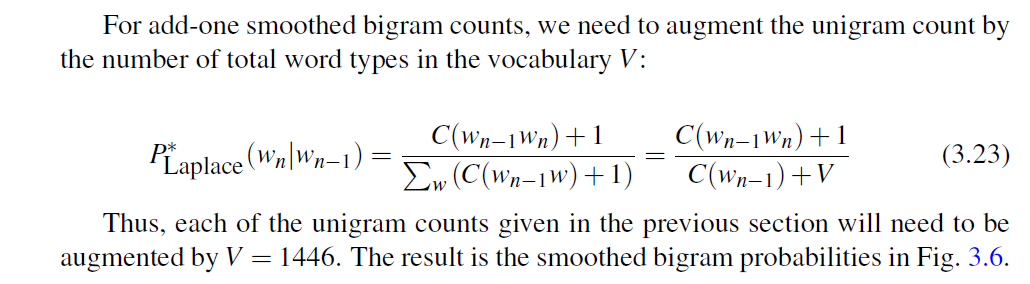

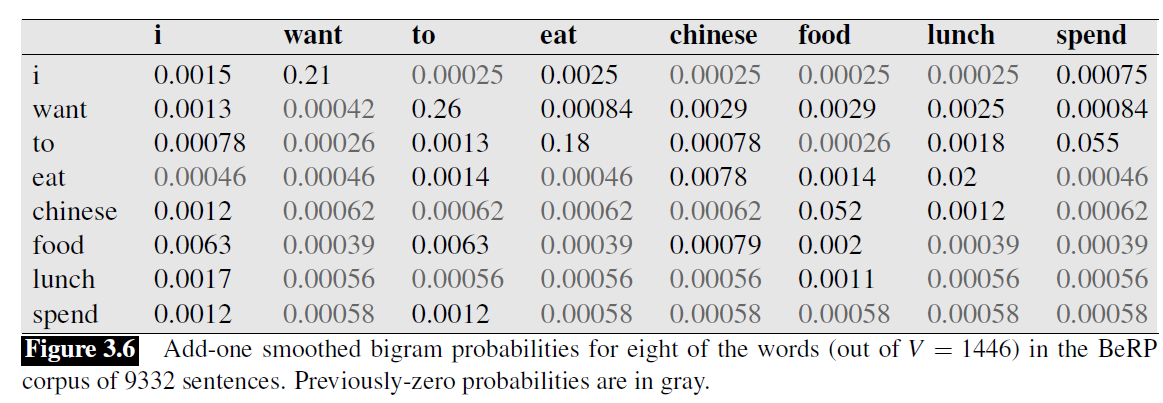

## reconstructed counts formula

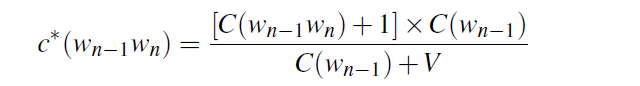

It is often convenient to reconstruct the count matrix so we can see how much a smoothing algorithm has changed the original counts. These adjusted counts can be computed by Eq. 3.24. Figure 3.7 shows the reconstructed counts.

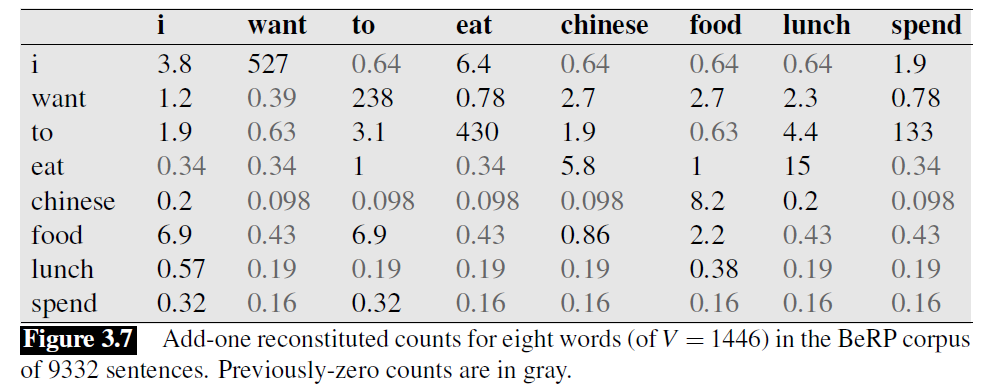

## The sharp change in counts and probabilities occurs because too much probability mass is moved to all the zeros.

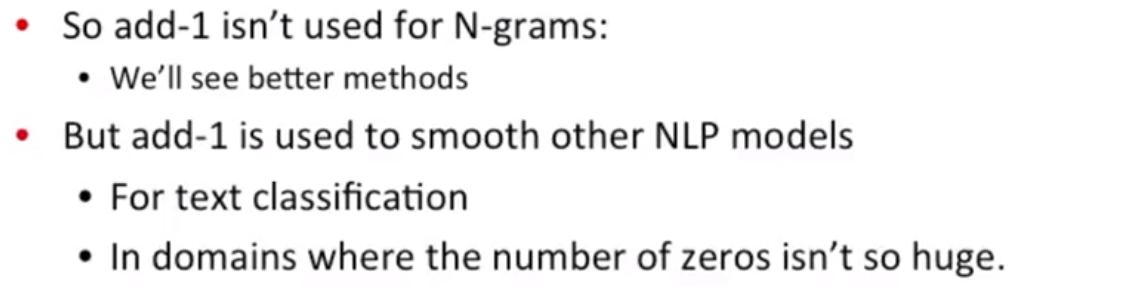

## Backoff and Interpolation

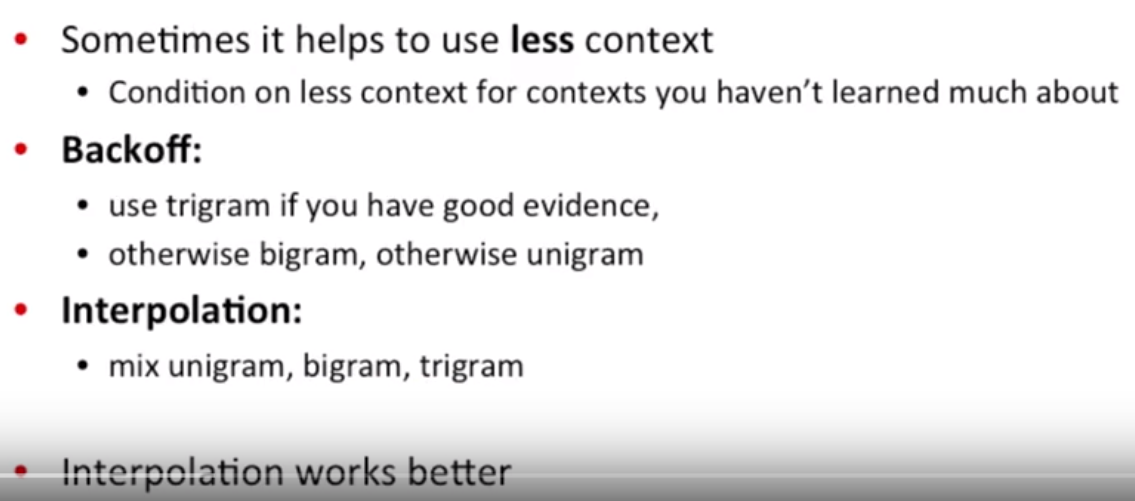

### In backoff, we use the trigram if the evidence is sufficient, otherwise we use the bigram, otherwise the unigram. In other words, we only “back off” to a lower-order n-gram if we have zero evidence for a higher-order interpolation n-gram.

### In interpolation, we always mix the probability estimates from all the n-gram estimators, weighing and combining the trigram, bigram, and unigram counts.

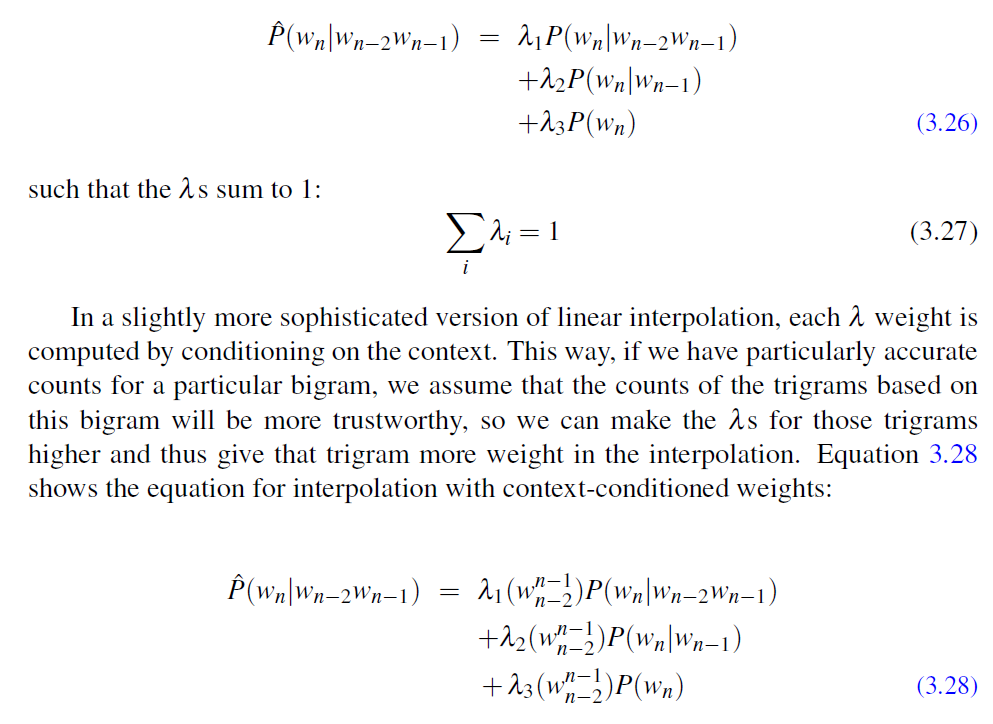

### How are these lambda values set? 

Both the simple interpolation and conditional interpolation lambdas are learned from a held-out corpus. A held-out corpus is an additional training corpus that we use to set hyperparameters like these lambda values, by choosing the lambda values that maximize the likelihood of the held-out corpus. That is, we fix the n-gram probabilities and then search for the lambda values that—when plugged into Eq. 3.26—give us the highest probability of the held-out set. There are various ways to find this optimal set of lambdas.

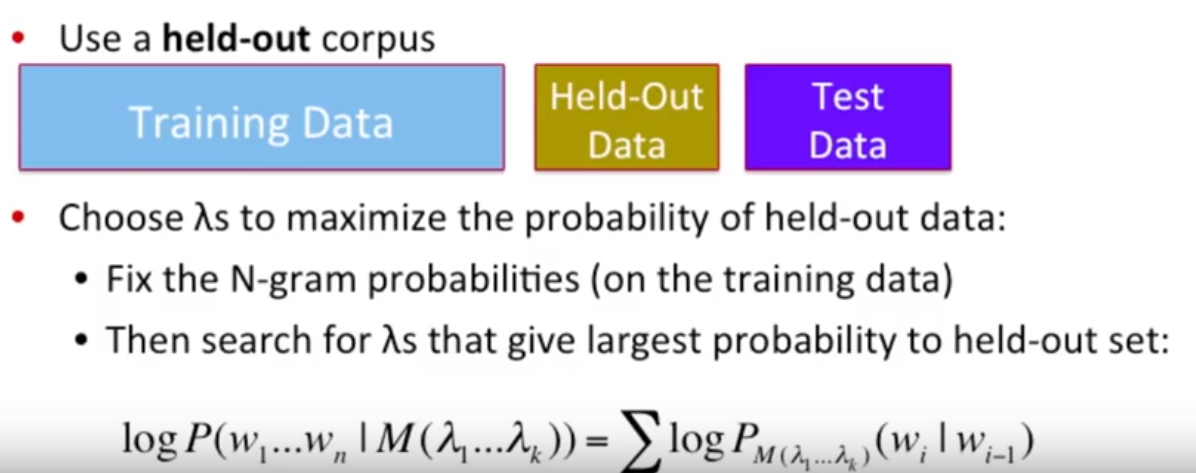

# What we will do this if we have set of words that we never seen before

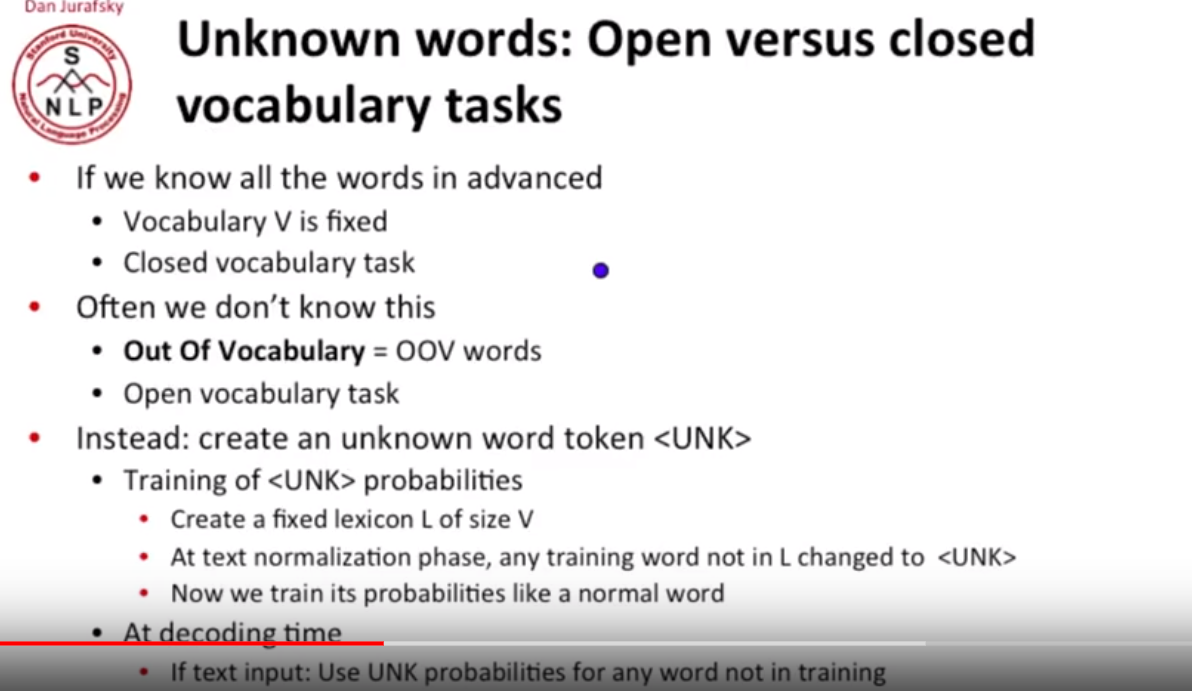

### for the words present in training corpus, that occur very rare (OOV- Out of vocabulary), we will take take that words and mark that word as < UNK >.

### So that during decoding time , model will take that kind of words into a category of <UNK>.
    
###   eg- WWW < UNK > WWW

# Huge web scale n-gram
## How to deal with

### Ex - Google N-grams corpus

## Pruning
- only store N-grams with count > threshold
 - Remove singletons of higher-order n-grams(acc. to jiff's law there will be lot of singleton count)
- Entropy-based pruning (compute perplexity n entropy on the test data )

## Efficiency
    - Efficient data structure like tries
    - Bloom filters: approximate language models
    - Store words as indexes, not strings
        - Use huffman codeing to fit large numbers of words into two bytes
    - Quantize probabilites (4-8 bits instead of 8-byte float)

In [ ]:
## smoothing for Web-scale N-grams
    - "Stupid backoff"
    - No discounting, just use relative frequencies

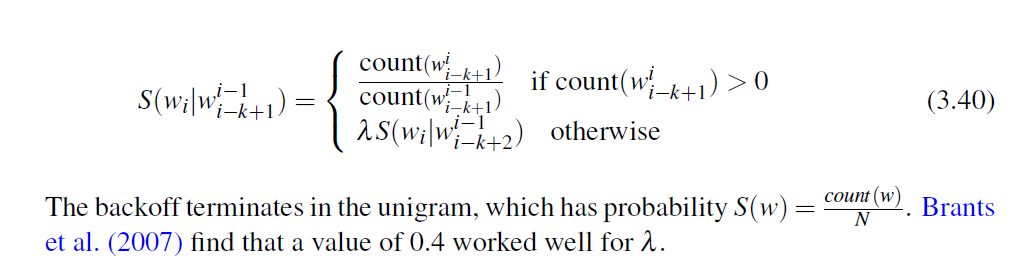

if i want to compute the stupid backoff probability of a word given some previous set of words.
I will use the MLE just a count of the word divided by the count of the prefix, if that count is greater than zero, if not i will just **Backoff** to the previous or lower order n-gram prefix with some constant weight.
So if trigram occurs more than zero then we take that otherwise i will go for bigram multiply by some constant.
If we dont have any thing at all we will use unigram 
Stupid backoff produce something like score

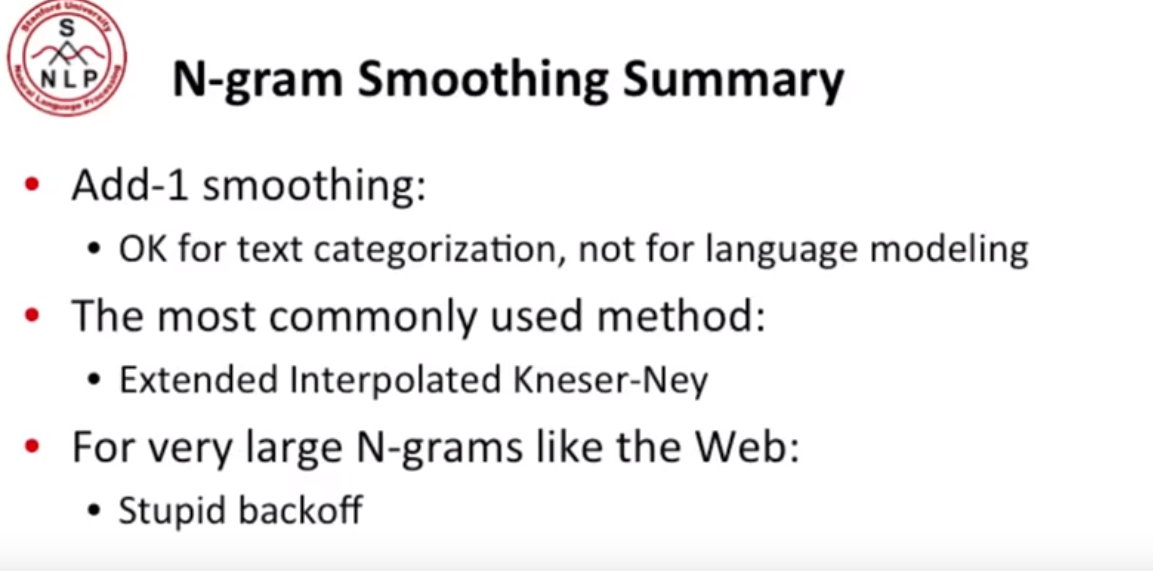

# *Now we will talk about some advance smoothing technique*

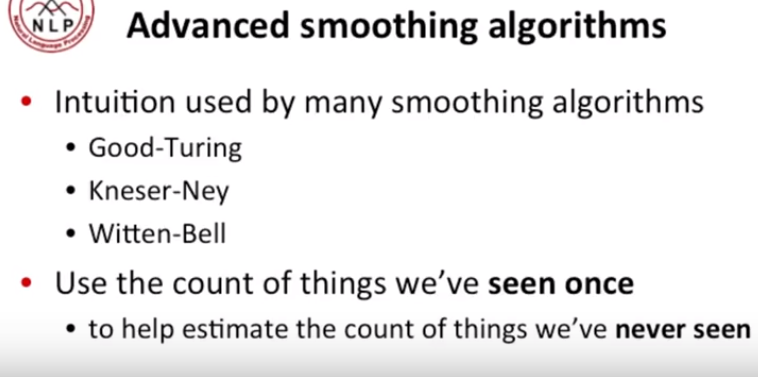

# GOOD-turning smoothing technique

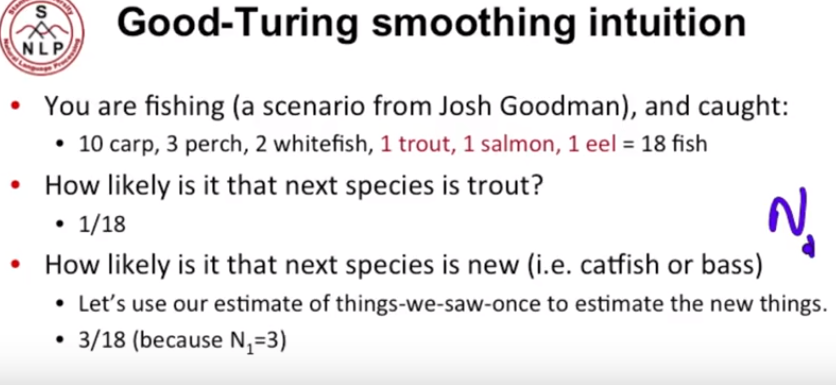

 if we Take some probability for the fish that we never see before then i.e 3/18, so for other fishes the probability will change for the other fishes.

P*(the things with zero frequnecy) = N1/N i.e 3/18

for others it will be 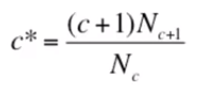

C*(trout) =2* N2/N1
          = 2* 1/3 = 2/3
          
         P*(trout) =2/3 /18 = 1/27

## ney et al.'s Good Turing Intuition

- We are having one training set with count c
- And we will create one held out set in which, one word from training set will we taken.
- when one word is taken into held out set, the size of a training set will be n-1.
- same process will repeat for held out set as shown in fig. 
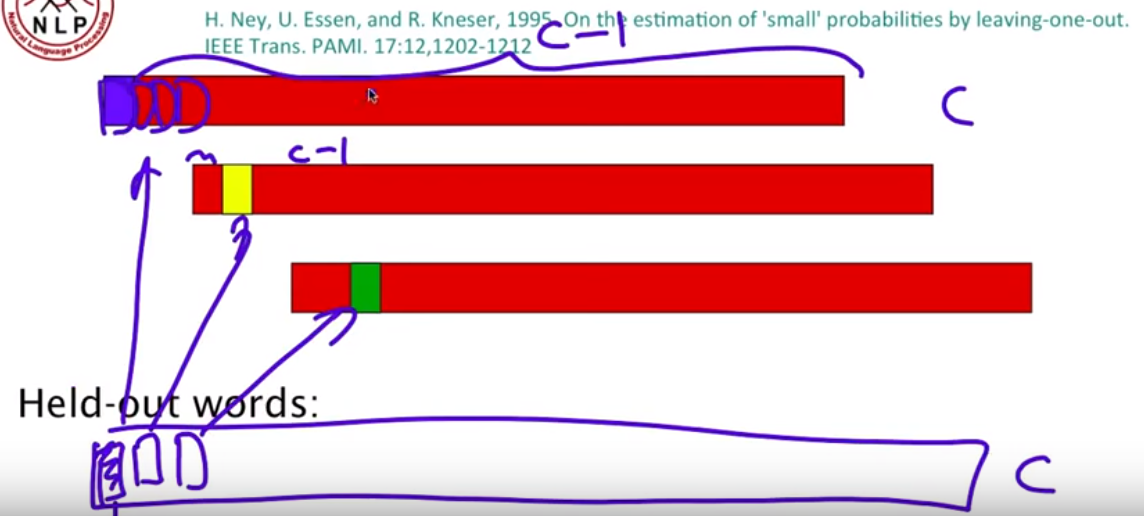

### NOW the fraction of held out words and expected count of words occur with training count k is K*

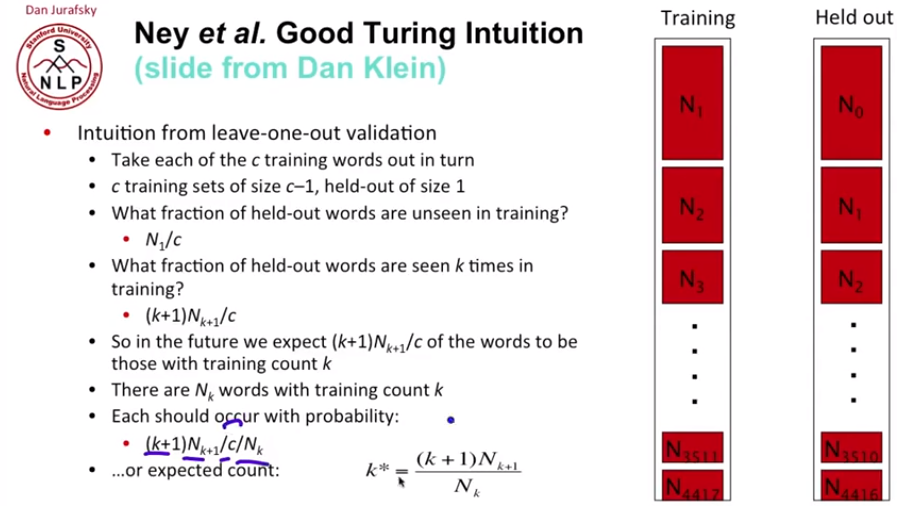

### Complication In good turing 
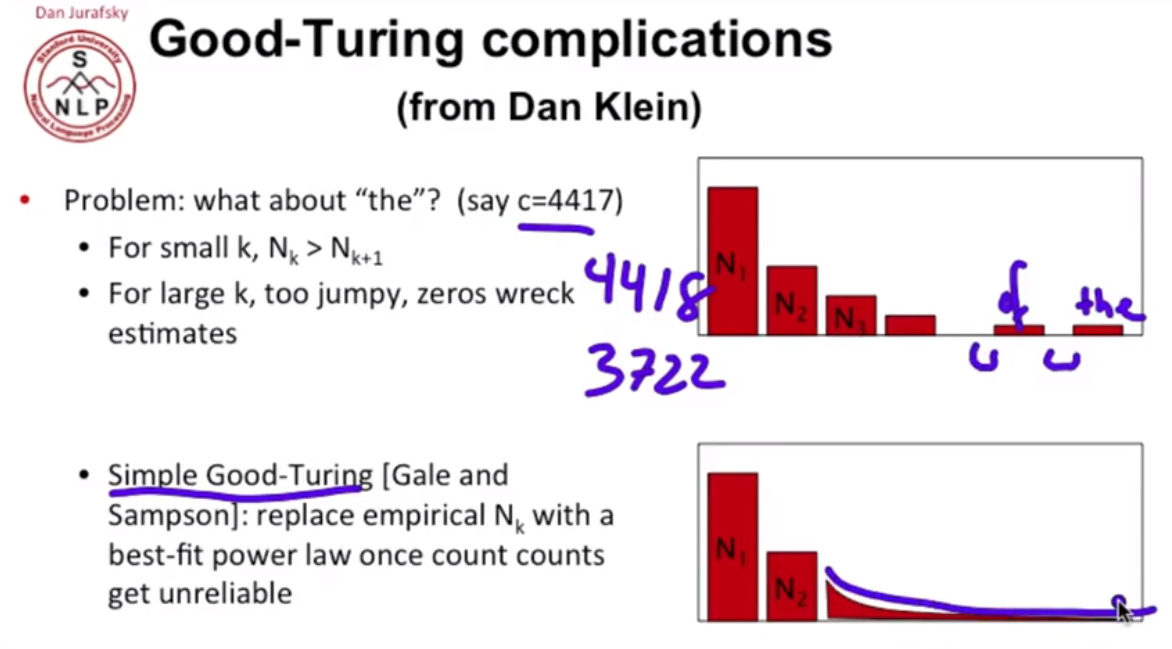

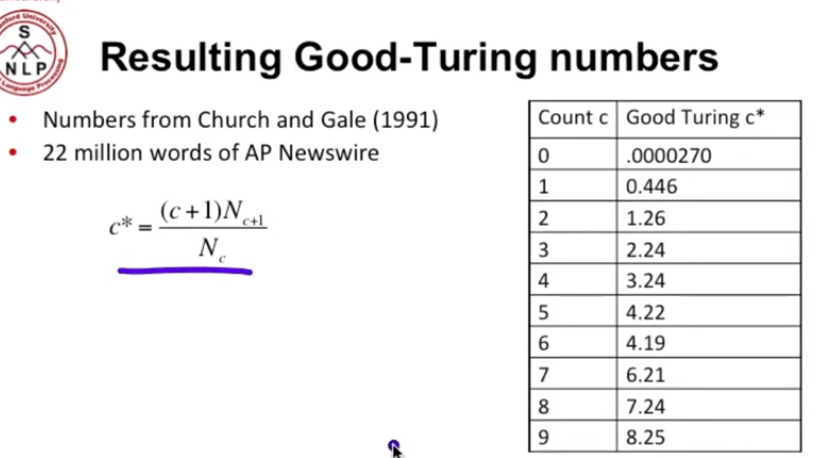

## each no. got discounted to give some room for thing with occur zero

# KNESER-NEY SMOOTHING

**Absolute discounting** formalizes this intuition by subtracting a fixed (absolute) discount d from each count. The intuition is that since we have good estimates already for the very high counts, a
small discount d won’t affect them much. It will mainly modify the smaller counts, for which we don’t necessarily trust the estimate anyway

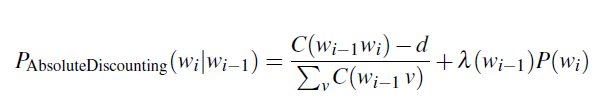

The first term is the discounted bigram, and the second term is the unigram with an interpolation weight lambda. We could just set all the d values to .75, or we could keep a separate discount value of 0.5 for the bigrams with counts of 1.

Kneser-Ney discounting (Kneser and Ney, 1995) augments absolute discounting with a more sophisticated way to handle the lower-order unigram distribution. Consider the job of predicting the next word in this sentence, assuming we are interpolating a bigram and a unigram model.


Every bigram type was a novel continuation the first time it was seen. We hypothesize that words that have appeared in more contexts in the past are more likely to appear in some new context as well. The number of times a word w appears as a novel continuation can be expressed as:

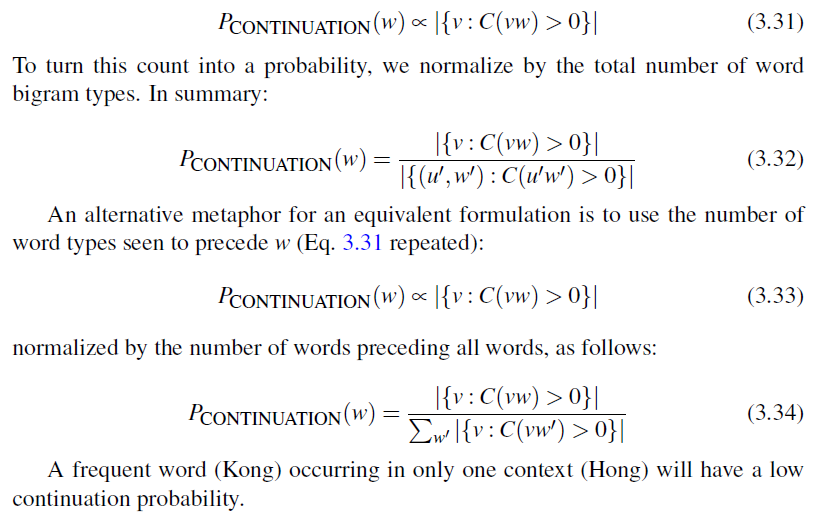

### The final equation for Interpolated Kneser-Ney smoothing for bigrams is then:

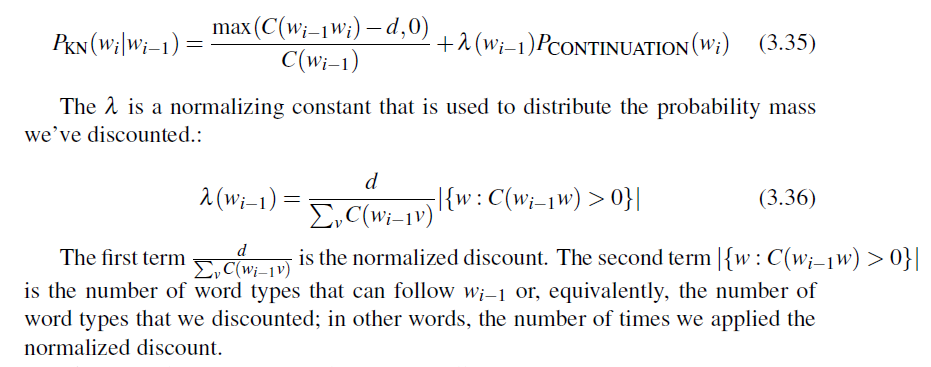

# FOR LAMBDA

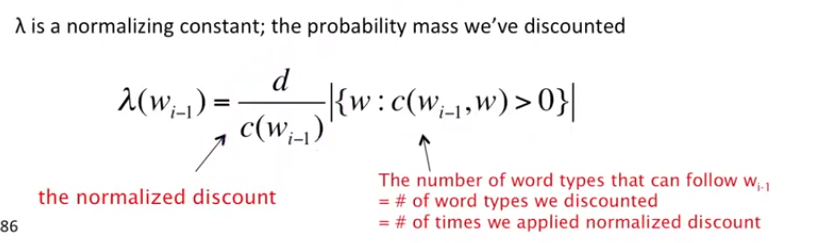

## General recursive formulation

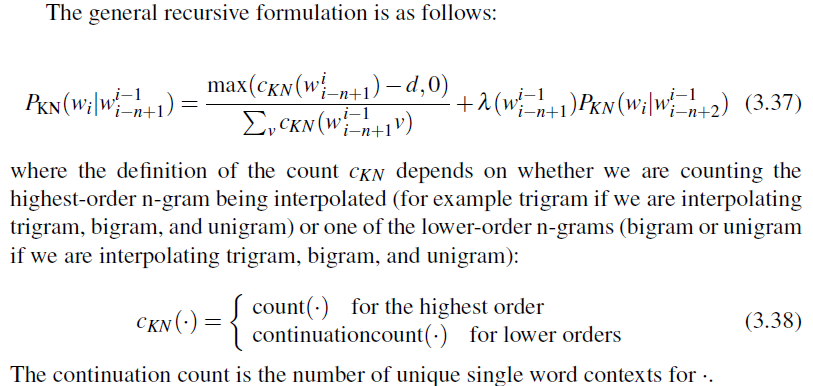